## 319 - Streamline Your Matplotlib Plots with Units!

[Youtube](https://www.youtube.com/watch?v=TT1pOpU1rn4)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime, timedelta, timezone
from metpy.units import units
from siphon.catalog import TDSCatalog

In [2]:
best_gfs  =TDSCatalog('https://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/'
                      'Global_0p5deg/catalog.xml?dataset=grib/NCEP/GFS/Global_0p5deg/Best')
best_ds = best_gfs.datasets[0]
ncss = best_ds.subset()
query = ncss.query()

In [3]:
now = datetime.now(timezone.utc)
query.lonlat_point(-150, 40).vertical_level(100000).time_range(now, now + timedelta(days = 7))
query.variables('Temperature_isobaric').accept('netcdf')

var=Temperature_isobaric&time_start=2024-12-24T19%3A14%3A16.163402%2B00%3A00&time_end=2024-12-31T19%3A14%3A16.163402%2B00%3A00&longitude=-150&latitude=40&vertCoord=100000&accept=netcdf

In [4]:
data = ncss.get_data(query)
list(data.variables)

['latitude',
 'longitude',
 'stationAltitude',
 'station_id',
 'station_description',
 'Temperature_isobaric',
 'time',
 'stationIndex']

In [5]:
temp = units(data.variables['Temperature_isobaric'].units) * data.variables['Temperature_isobaric'][:]
time = units('hours') * data.variables['time'][:]
time -= time[0]

In [6]:
temp

Magnitude,[288.50897216796875 289.3809814453125 289.5726013183594 289.0378112792969 288.3304443359375 287.885986328125 288.3705749511719 287.27587890625 285.3717956542969 286.04437255859375 286.5973815917969 287.5667724609375 286.90997314453125 287.0348815917969 288.6890563964844 285.718505859375 285.4393310546875 286.0465087890625 285.98321533203125 286.9658203125 289.07208251953125 284.70233154296875 285.1331481933594 285.4140319824219 284.8374328613281 283.94268798828125 284.9742431640625 283.2496337890625 282.7740783691406 282.8240051269531 282.4521179199219 281.72003173828125 282.2244567871094 282.2943420410156 282.1954040527344 282.2153625488281 282.01361083984375 282.1914367675781 283.0316162109375 283.78790283203125 284.1328125 284.24334716796875 284.8294372558594 284.81304931640625 284.6045837402344 284.56427001953125 284.8164367675781 284.78875732421875 284.1231689453125 284.40228271484375 284.7742919921875 285.2552795410156 285.3525085449219 285.564697265625 285.741943359375 286.121337890625 286.7764892578125]
Units,kelvin


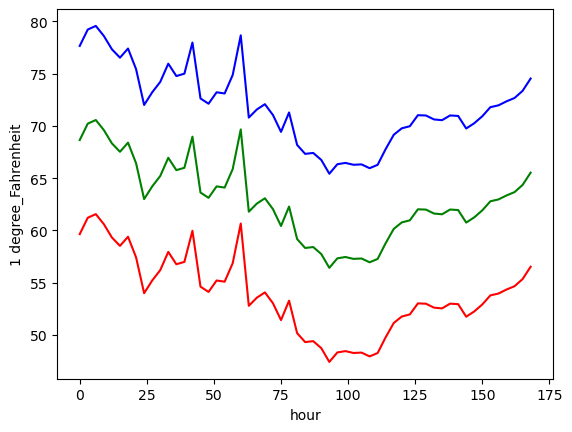

In [7]:
fig, ax = plt.subplots()
ax.plot(time, temp, 'r')
ax.plot(time, temp + 5 * units('kelvin'), 'g')
ax.plot(time, temp + 10 * units('kelvin'), 'b')
ax.yaxis.set_units(units('degF'))